In [ ]:
import numpy as np
import pandas as pd

import os
import time
from IPython import display 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import log_loss

# model evaluation for classification
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [151]:
train_df = pd.read_csv("../data/titanic/input/train.csv")
test_df = pd.read_csv("../data/titanic/input/test.csv")

In [152]:
combine = [train_df, test_df]

In [153]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S


In [154]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
45,937,3,"Peltomaki, Mr. Nikolai Johannes",male,25.0,0,0,STON/O 2. 3101291,7.9250,NaN,S
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C


In [155]:
print('The shape of train-data: {}'.format(train_df.shape))
print('The shape of test-data: {}'.format(test_df.shape))

The shape of train-data: (891, 12)
The shape of test-data: (418, 11)


# Data Type

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
categ_cols = list(train_df.dtypes[train_df.dtypes == 'object'].index)
numer_cols = list(train_df.dtypes[train_df.dtypes != 'object'].index)
print('Categorical variable:',categ_cols)
print('Numerical variable:',numer_cols)

Categorical variable: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical variable: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [158]:
mixed_cols = ['Ticket', 'Cabin']
print('Mixed variable:', mixed_cols)

Mixed variable: ['Ticket', 'Cabin']


# Missing Value

In [159]:
missing_table = pd.DataFrame({'missing_n': train_df.isnull().sum(),
                             'percentage': round((train_df.isnull().sum() / train_df.shape[0])*100,2)})

In [160]:
missing_table

,missing_n,percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


# Explore


Sex: 여자 생존율 높을 듯  
SibSp/Parch: 혼자 온 사람이 더 생존율 높을 듯  
Age: 어릴 수록 생존율 높을 듯  
Pclass: 좌석이 좋을 수록 생존율 높을 듯  


In [161]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kraeff, Mr. Theodor",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [163]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().reset_index().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


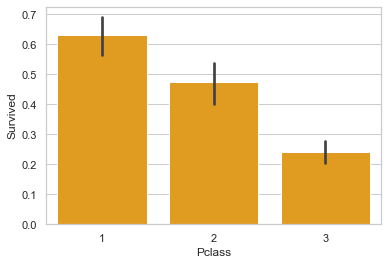

In [164]:
sns.barplot('Pclass', 'Survived', data=train_df, color='orange')
plt.show()

In [165]:
bind_cols = ['Pclass', 'Parch', 'Sex', 'SibSp', 'Embarked']

In [ ]:
for col in bind_cols:
    sns.barplot(col,'Survived', data=train_df, color='orange')
    plt.show()

# Y correlating

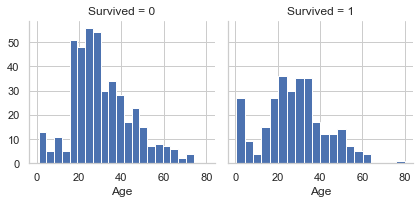

In [167]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

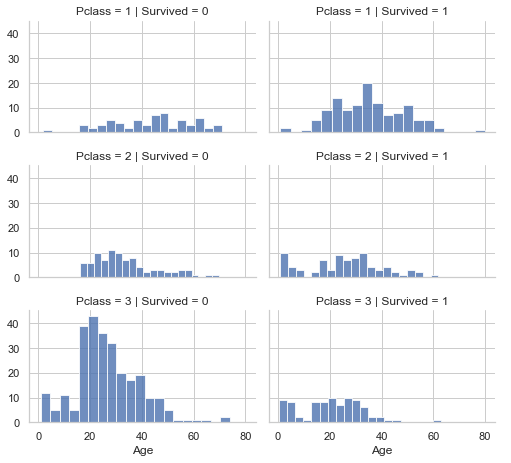

In [168]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend();

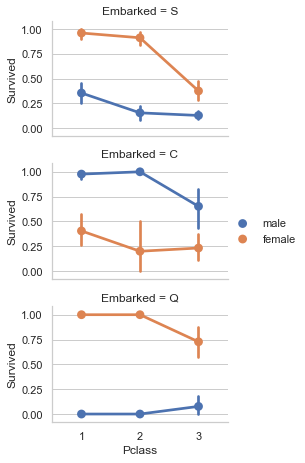

In [169]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [170]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [171]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [172]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [173]:
for dataset in combine:
    encoder = preprocessing.LabelEncoder()
    dataset['Title'] = encoder.fit_transform(dataset['Title'])

In [174]:
train_df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,26.2500,S,1
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,57.9792,C,3


In [254]:
encoder.get_params(deep=True)

{}

In [175]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [176]:
for dataset in combine:
    encoder = preprocessing.LabelEncoder()
    dataset['Sex'] = encoder.fit_transform(dataset['Sex'])

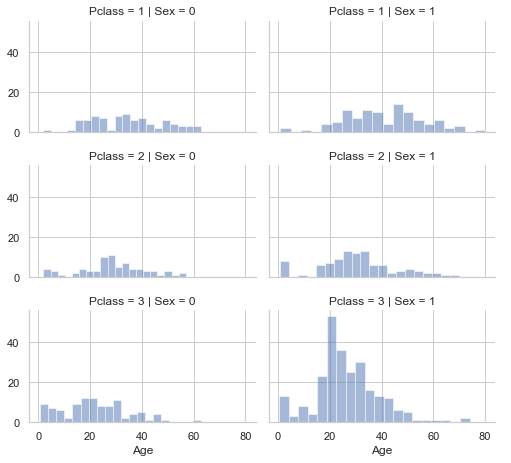

In [177]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Missing Value

In [178]:
# for dataset in combine:
#     dataset['Age'].fillna(dataset['Age'].mean(skipna=True), inplace=True)

In [ ]:
# Title 그룹 별 평균으로 mapping해서 missing value 처리
age_mean = train[['Title', 'Age']].groupby(['Title']).mean().astype('int').reset_index()
age_mean.rename(columns={'Age':'Age_mean'}, inplace=True)
age_mean = pd.DataFrame(age_mean)
train['Age_group_mean'] = train['Age_group_mean'].fillna(train['Title'].map(age_mean.set_index('Title')['Age_mean']))

In [180]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [181]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,2
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,1
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,2


### Numerical Binding 방법 1

In [ ]:
bins= [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager',
       'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age_2'], bins, labels= labels)
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)

### Numerical Binding 방법 2

In [182]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [183]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,2,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,1,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,2,"(32.0, 48.0]"


In [184]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,2
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,1
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,2


In [185]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [186]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [187]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,2,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,1,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,2,1


In [188]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [189]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [191]:
train_df.Embarked.dropna().mode()

0    S
dtype: object

In [192]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Label Encoding 대신 직접 mapping

In [193]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,2,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,1,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,2,1,6


In [194]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,7.8292,2,2,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,2,1,6
3,895,3,1,1,8.6625,0,2,1,3
4,896,3,0,1,12.2875,0,3,0,3


In [195]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [301]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,2,0,3
1,1,1,0,2,3,1,3,0,2


In [300]:
test_df.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,2,1,6
1,893,3,0,2,0,0,3,0,6


In [198]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone', 'Age*Class'],
      dtype='object')

# Feature selection

#### RFECV :: RFE + CV
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features.  
Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
# RFE object 만들고 -> CV score

cols = list(set(train_df.columns) - set('Survived'))
x = train_df[cols]
y = train_df['Survived']

# 로지스틱 regression 모델
model = LogisticRegression()
# REF 모델 :: 6개 속성으로
rfe = RFE(model, 6)
rfe = rfe.fit(x, y)
# REFCV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x, y)
# 선택된 속성 요약
print('Selected Features: %s' % list(x.columns[rfe.support_])) 
print('Selected Featreus: %s' % list(x.columns[rfecv.support_]))

Selected Features: ['Pclass', 'Survived', 'Sex', 'Title', 'IsAlone', 'Fare']
Selected Featreus: ['Survived']


In [210]:
print("Optimal number of features: %d" % rfe.n_features_)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 6
Optimal number of features: 1


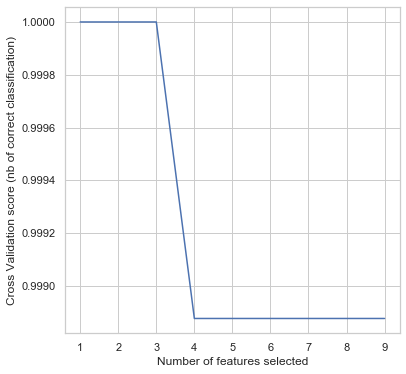

In [212]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(6,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation score (nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

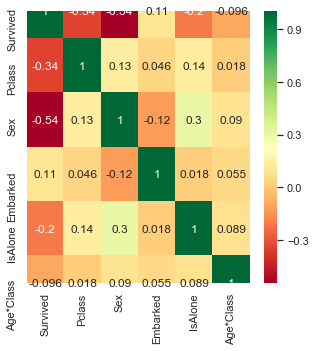

In [222]:
# 선택된 변수들간의 상관관계 파악
Selected_features = train_df.columns[rfe.support_]
x = train_df[Selected_features]

plt.subplots(figsize=(5,5))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')
plt.show()

# Model Predict

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [228]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

x_test = test_df.drop('PassengerId', axis=1).copy()

x_train.shape, y_train.shape, x_test.shape 

((891, 8), (891,), (418, 8))

In [244]:
from sklearn.model_selection import train_test_split

x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train,
                                                 test_size=0.22,
                                                 random_state=0)

In [245]:
x_train2.shape, y_train2.shape, x_val.shape, y_val.shape

((694, 8), (694,), (197, 8), (197,))

## Logistic

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

In [231]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train)*100, 2)
acc_log

78.9

In [248]:
logreg.fit(x_train2, y_train2)

y_pred = logreg.predict(x_val)

acc_log = accuracy_score(y_val, y_pred)
loss_log = log_loss(y_val, y_pred)
auc_log = metrics.roc_auc_score(y_val, y_pred)

In [249]:
print('Train/val split results:')
print(logreg.__class__.__name__ + '  accuracy is %2.3f' % acc_log)
print(logreg.__class__.__name__ + '  log_loss is %2.3f' % loss_log)
print(logreg.__class__.__name__ + '  auc is %2.3f' % auc_log)

Train/val split results:
LogisticRegression  accuracy is 0.802
LogisticRegression  log_loss is 6.838
LogisticRegression  auc is 0.778


In [241]:
# Feature Selected
Selected_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Age*Class']
print("Check the accuracy of Selected data:",
     Selected_features)

logreg_pick = LogisticRegression()
logreg_pick.fit(x_train[Selected_features], y_train)
# y_pred_pick = logreg_pick.predict(x_test)

acc_log_pick = round(logreg_pick.score(x_train[Selected_features], y_train)*100, 2)
acc_log_pick

Check the accuracy of Selected data: ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Age*Class']


78.45

## Cross Validation

In [ ]:
# logreg = LogisticRegression() //  x = train.drop(['Survived'], axis=1) // y = train['Survived']
scores_accuracy = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')

acc_log = scores_accuracy.mean()
loss_log = -scores_log_loss.mean()
auc_log = scores_auc.mean()

## Coefficient로 X-variables 평가

In [242]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Embarked,0.279992
2,Age,0.274286
6,IsAlone,0.119560
3,Fare,0.106230
5,Title,-0.111728
7,Age*Class,-0.293896
0,Pclass,-0.584521
1,Sex,-2.405411


Sex가 male(1)일때 생존확률이 떨어짐  
Pclass 증가할 수록 생존율 떨어짐  
Age*Class 나쁘지 않은 새로운 변수  

## SVM

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

In [261]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

83.39

In [285]:
y_pred = svc.predict(x_val)

acc_svc = accuracy_score(y_val, y_pred)
loss_svc = log_loss(y_val, y_pred)
auc_svc = metrics.roc_auc_score(y_val, y_pred)

## KNN

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

In [289]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

y_pred = knn.predict(x_val)
acc_knn = accuracy_score(y_val, y_pred)

acc_knn

0.8477157360406091

## Gaussian Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

In [290]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

y_pred = gaussian.predict(x_val)
acc_gaus = accuracy_score(y_val, y_pred)

acc_gaus

0.7157360406091371

## Linear SVC

In [291]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

y_pred = linear_svc.predict(x_val)
acc_l_svc = accuracy_score(y_val, y_pred)

acc_l_svc

0.7969543147208121

## Decision Tree

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

In [292]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

y_pred = decision_tree.predict(x_val)
acc_dt = accuracy_score(y_val, y_pred)

acc_dt

0.8730964467005076

In [295]:
decision_tree.fit(x_train, y_train)

print('Train Score: ', decision_tree.score(x_train2, y_train2))
print('Valid Score: ', decision_tree.score(x_val, y_val))

Train Score:  0.8659942363112392
Valid Score:  0.8730964467005076


train과 valid 차이가 너무 나면 overfitting

## Random Forest

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

In [293]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

y_pred = random_forest.predict(x_val)
acc_rf = accuracy_score(y_val, y_pred)

acc_rf

0.883248730964467

In [ ]:
params = {
    'n_estimators' : [100, 300, 500],
    'max_depth' : [2,4,6,8],
#     'min_sample_leaf' : [2,4,6], 'min_sample_split' : [2,4,6]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid= params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

# Model Evaluation

In [294]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rf, acc_gaus, 
              acc_l_svc, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.883249
6,Decision Tree,0.873096
1,KNN,0.847716
0,Support Vector Machines,0.837563
2,Logistic Regression,0.802030
5,Linear SVC,0.796954
4,Naive Bayes,0.715736


# Conclustion
RF 모델과 DT 모델이 가장 높은 score를 보여 최종 모델로 선정  
두가지 모델 중 overfitting 문제에 더 robust한 RF 모델로 최종 선정

In [281]:
test_df.sample(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
153,1045,3,0,2,1,0,3,0,6
114,1006,1,0,3,3,0,3,0,3


In [282]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)

In [283]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [284]:
submission.sample(2)

,PassengerId,Survived
247,1139,0
320,1212,0
